# Random Forest - an ensemble learner built on decision trees

- an ensemble of trees, not just one tree
- widely used, very good results on many problems
- one decision tree  is prone to overfitting, many decision trees are more stable, better generalization
- ensemble of trees should be diverse, meaning random variation is built into how the trees are build.

```python
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
```

**1. Load the dataset**

In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

iris = datasets.load_iris()

**2. Checkout the dataset**

In [2]:
iris.target_names # class labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris.feature_names # list of features

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

**3.1 Create the X and y and split into training and test**

In [6]:
X = iris.data
y = iris.target

In [7]:
X[:5],y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

**3.2 Use a dataframe to create the X and y**

In [8]:
import pandas as pd

In [9]:
data = pd.DataFrame({
        'sepal length':iris.data[:,0],
        'sepal width':iris.data[:,1],
        'petal length':iris.data[:,2],
        'petal width':iris.data[:,3],
        'species':iris.target})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
X = data[['sepal length','sepal width','petal length','petal width']]
y = data['species']
X.head(),y.head()

(   sepal length  sepal width  petal length  petal width
 0           5.1          3.5           1.4          0.2
 1           4.9          3.0           1.4          0.2
 2           4.7          3.2           1.3          0.2
 3           4.6          3.1           1.5          0.2
 4           5.0          3.6           1.4          0.2,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: species, dtype: int32)

In [11]:
# split training and test datasets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 5, stratify=y)

**4.Create and train the model**

In [12]:
# create
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**5. Predict!**
Random forest algorithm makes a prediction for every tree in the forest. 
Then, combines individual predictions, in classification
- each tree gives a probability for each class
- probabilities are averaged across trees
- predict the class with highest probability

In [13]:
y_pred = clf.predict(X_test)

In [14]:
y_pred[:5]

array([0, 2, 1, 0, 1])

Predict the following observation: 

    sepal length = 3
    sepal width = 5
    petal length = 4
    petal width = 2


In [15]:
clf.predict([[3,5,4,2]])

array([1])

**6. Review model performance**

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [17]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [18]:
confusion_matrix(y_test,y_pred)

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  1, 14]], dtype=int64)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



#### 7. Plot the confusion matrix

Text(83.40000000000006, 0.5, 'predicted label')

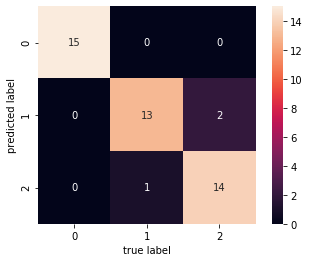

In [26]:
mat = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.heatmap(mat,annot=True,square=True,cbar=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

**Precision Score**
```python 
sklearn.metrics.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
```
Compute the precision

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

**Recall Score**
```python
sklearn.metrics.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')```

Compute the recall

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

The **support** is the number of samples of the true response that lie in that class. 

The **F1 score** can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0

**8. Find the feature importance and plot it!**

In [27]:
clf.feature_importances_

array([0.11327488, 0.0275842 , 0.4555052 , 0.40363573])

In [28]:
feature_imp = pd.Series(clf.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.455505
petal width (cm)     0.403636
sepal length (cm)    0.113275
sepal width (cm)     0.027584
dtype: float64

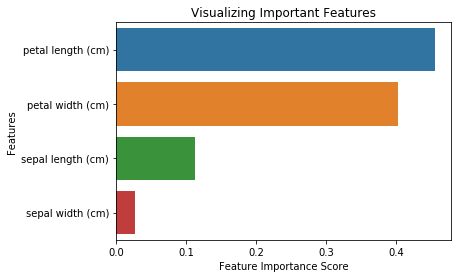

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features");

### Generating the Model on Selected Features

In [30]:
# create the new datasets
X2 = data[['petal length','petal width']]
y2 = data['species']
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.3,random_state=5,stratify=y)

In [31]:
clf2 = RandomForestClassifier()
clf2.fit(X2_train,y2_train)
y2_pred = clf2.predict(X2_test)

In [32]:
accuracy_score(y2_test,y2_pred)

0.9333333333333333

Text(83.40000000000006, 0.5, 'predicted label')

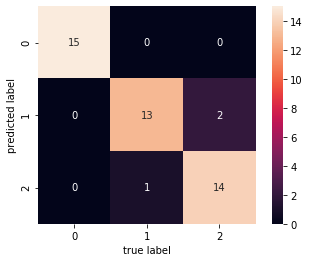

In [33]:
mat2 = confusion_matrix(y2_test,y2_pred)
sns.heatmap(mat2,annot=True,square=True)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [36]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
# Import train_test_split function
# Split dataset into features and labels
# Split dataset into training set and test set, 70% training and 30% test


In [ ]:
#Create Random Forest Classifier

#Train the model using the training sets y_pred=clf.predict(X_test)

# prediction on test set

# Model Accuracy, how often is the classifier correct?


In [ ]:
#create the confusion matrix and plot the heatmap


In [ ]:
#### compare classification reports of 2-feature model and 4-feature model

In [37]:
# model with 2 features
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [38]:
# model with 4 features
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



**Done with Random Forest Iris Example**